In [95]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

%matplotlib inline

In [51]:
df = pd.read_csv("Advertising.csv")
df.head()

# TV, radio, newspaper are the features
# sales is the target value

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [52]:
# Simple Linear Regresion - one feature
# y = mx + c
# x - single feature
# parameters - m & c

In [53]:
X = df['TV']      # TV ads spendings
y = df['sales']

<AxesSubplot:xlabel='TV', ylabel='sales'>

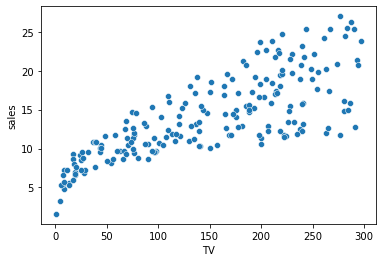

In [54]:
sns.scatterplot(x=X,y=y, data=df)

# we have a linear relationship between TV ads and Sales

In [55]:
# We have to ensure that our data is in 2-dimesional format!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!
# currently X is 1 dimensional so we need to change it to 2

X.ndim, X.shape  # it's a single dimesion with no column, just 200 values

(1, (200,))

In [56]:
# To change the shape of X use reshape(-1,1) 
X = X.values.reshape(-1,1)   # -1 means the values become rows, 1 becomes one column

In [57]:
X.ndim, X.shape    # npw we have 2 dimensional with 1 column

(2, (200, 1))

In [59]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=101)

In [60]:
# initialise the model

lr = LinearRegression()

In [62]:
# fit the model

lr.fit(X_train,y_train)

LinearRegression()

In [63]:
lr.coef_

array([0.0466785])

In [64]:
lr.intercept_

7.162130285625708

In [72]:
y_predictions = lr.predict(X_test)
y_predictions

array([10.64901399, 19.08381834, 12.43213256, 12.28742922,  8.63250293,
        8.06769312, 19.42457137, 17.12332148, 13.71112337, 17.45473881,
        8.93591316, 15.36354216, 17.54342795, 16.44648328, 16.2037551 ,
        9.24865909, 19.43390707, 11.62926242,  9.49605512, 17.80482753,
        8.07702882, 15.15815677, 20.08740602, 19.35922147, 10.38294656,
       16.48849393, 20.86693692,  9.94416869, 14.89208934,  7.96500043,
        8.27307851, 17.42206386, 13.43105239,  7.77828644, 15.4242242 ,
       11.69928017, 11.2324952 , 11.55924468,  7.7082687 , 14.47198287,
       10.32693236, 13.67378058, 11.65260167,  8.03968602, 10.72836743,
       10.39228226,  7.41419417, 17.76748474, 15.60160249, 16.28310854,
        9.23932339, 16.81991125, 20.24144506, 12.6328501 , 16.48849393,
        7.35351212, 19.62062106,  9.00593091, 19.55993901, 15.33553506,
       16.18041585, 20.58686594, 10.90574572, 15.68562378, 17.54342795,
       18.87376511, 15.92835197, 10.81238873, 13.02961732, 13.28

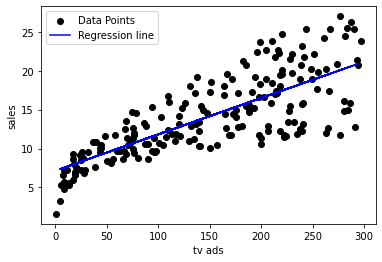

In [78]:
plt.scatter(x=X,y=y,c='black', label='Data Points')
plt.plot(X_test, y_predictions,c='blue', label='Regression line')
plt.xlabel('tv ads')
plt.ylabel('sales')
plt.legend()

In [79]:
# Evaluate the model

In [80]:
from sklearn.metrics import r2_score

In [82]:
# R squared is a goodness of fit measure for the linear regression models. 0-1 scale
# Features can explain 61% of variance in the target column.

r2_score(y_test,y_predictions)

0.6029618995220447

# Multiple Linear Regresion

In [125]:
df.head()

,Unnamed: 0,TV,radio,newspaper,sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


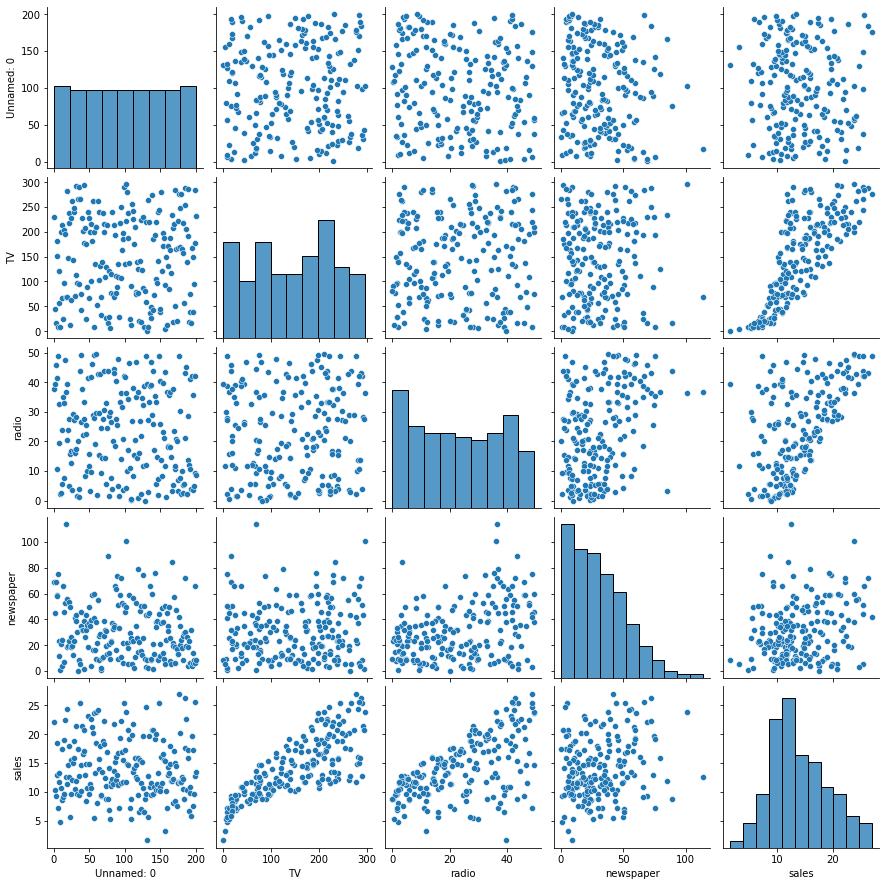

In [126]:
# No correlation between the independent features

sns.pairplot(df)

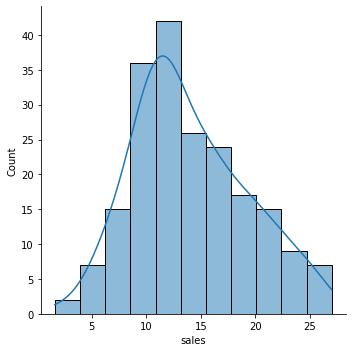

In [127]:
# We are predicting sales

sns.displot(df['sales'], kde=True)

<AxesSubplot:>

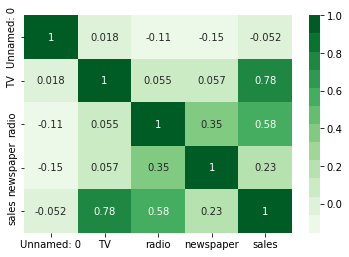

In [128]:
colormap = sns.color_palette("Greens",12)
sns.heatmap(df.corr(), cmap=colormap, annot=True)

In [129]:
# Features

X = df.drop(columns=['Unnamed: 0', 'newspaper','sales'])
X.head()

,TV,radio
0,230.1,37.8
1,44.5,39.3
2,17.2,45.9
3,151.5,41.3
4,180.8,10.8


In [130]:
# Target variable --> sales

y = df['sales']

In [155]:
# Split data into test and train

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=101)

In [156]:
# Get the model

from sklearn.linear_model import LinearRegression

In [157]:
# Instatiate the model

lr = LinearRegression()

In [183]:
# Fit / Train the model on the training data

model = lr.fit(X_train, y_train)

In [159]:
# Get the intercept and coefficients

print('Intercept: ', lr.intercept_)
print('Coefficients: ', lr.coef_)

Intercept:  3.146050012880224
Coefficients:  [0.04468799 0.18742267]


In [160]:
X_train.columns

Index(['TV', 'radio'], dtype='object')

In [161]:
cdf = pd.DataFrame(data=lr.coef_, index=X_train.columns, columns=['Coeff'])
cdf

,Coeff
TV,0.044688
radio,0.187423


In [162]:
# Predictions

y_predictions = lr.predict(X_test)

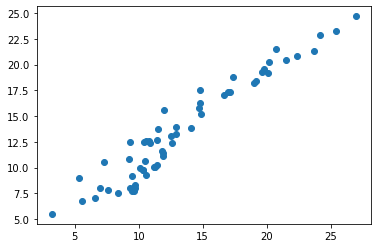

In [163]:
# We want to know how far off are the predicted values from the actual prices

plt.scatter(y_test,y_predictions)

C:\Users\go27s\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:xlabel='sales', ylabel='Density'>

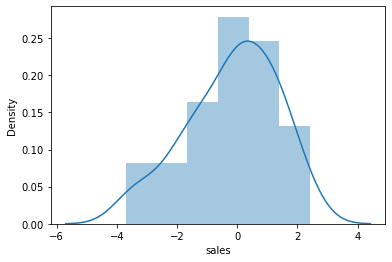

In [164]:
# Histogram of our risiduals - difference between the actual values(y_test) and the predicted values
sns.distplot((y_test-y_predictions))

# Risidulas are normally distributed, which means that the model was a correct choice for the data. 
# If the risiduals are not normally distributed, perhaps a different model needs to be used.

# Model Evaluations

In [165]:
# R squared: goodness of fit

from sklearn.metrics import r2_score
r2_score(y_test,y_predictions)

# 3 features can explain for 90% of the variance in the data

0.9185476109820698

In [166]:
from sklearn.metrics import mean_squared_error, mean_absolute_error

In [167]:
# How close a regression line is to a set of data pints. It take the average of the errors and squares it.
# To find the MSE, take the observed value, subtract the predicted value, and square that difference. 
# Repeat that for all observations. Then, sum all of those squared values and divide by the number of observations.

mean_squared_error(y_test, y_predictions)

2.2995771958957367

In [168]:
# MAE is the average distance between the real data and the predicted data, but fails to punish large errors in prediction.

mean_absolute_error(y_test, y_predictions)

1.214643818411742

In [169]:
np.sqrt(mean_squared_error(y_test, y_predictions))

1.5164356880183665

# Assumptions

In [ ]:
# Check for correlation between the X and y. If the correlation is too low for all variables, 
# they are not meaningful to explain the Y. 
# Independent variables CANNOT correlate with each other. If they do, remove them

In [170]:
# 1. Linear and additive relationship

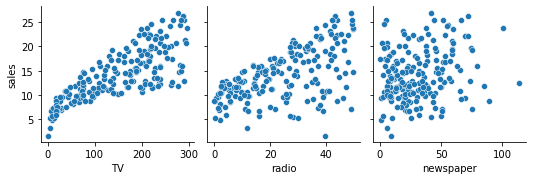

In [171]:
sns.pairplot(df, x_vars = ['TV', 'radio', 'newspaper'], y_vars='sales')

In [172]:
# 2. Check if mean residuals is equal to zero (difference between prediction value and the actual value)

In [178]:
residuals = (y_test-y_predictions)
# residuals

In [179]:
# Having a negative residual means that the predicted value is too high, similarly if you have a positive residual 
# it means that the predicted value was too low. The aim of a regression line is to minimise the sum of residuals.

mean_residuals = np.mean(residuals)
print(f"The mean risidual is: {mean_residuals}")

The mean risidual is: -0.18261512590256482


In [180]:
# 3. Homoskedacity: constant variance

C:\Users\go27s\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'residuals')

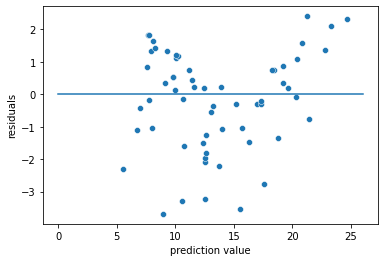

In [181]:
p = sns.scatterplot(x=y_predictions, y=residuals)
p = sns.lineplot([0,26], [0,0])
plt.xlabel('prediction value')
plt.ylabel('residuals')

In [177]:
# How to fix non-linearity
# There is no bullet-proof way to fix non-linearity. If there are multiple independent variables in a regression analysis, 
# the first step is to identify the target independent variable that has a non-linear relationship with the dependent variable.

In [182]:
# Check for Homoscedastic
# Gold Feld Quandt Test
# The Goldfeld-Quandt test is used to determine if heteroscedasticity is present in a regression model.
# Heteroscedasticity refers to the unequal scatter of residuals at different levels of a response variable in a regression model
# If heteroscedasticity is present, this violates one of the key assumptions of linear regression that the residuals are equally
# scattered at each level of the response variable.

In [187]:
from statsmodels.compat import lzip
import statsmodels.stats.api as sms

In [192]:
# Null --> Error terms are homoscedastic
# Alternate --> Error terms are heterosceastic

lzip(['test-statics', 'p-value', 'alternative'], sms.het_goldfeldquandt(residuals,X_test))

[('test-statics', 1.2034836500313664),
 ('p-value', 0.3137144889922356),
 ('alternative', 'increasing')]

In [ ]:
# Since the p-value is not less than 0.05, we fail to reject the null hypothesis. We don't have sufficient evidence that 
# heteroscedasticity is a problem in our model



# If you fail to reject the null hypothesis of the Goldfeld-Quandt test then heteroscedasticity is not present and 
# you can proceed to interpret the output of the original regression.
# However, if you reject the null hypothesis, this means heteroscedasticity is present in the data. 
# In this case, the standard errors that are shown in the output table of the regression may be unreliable.

In [193]:
# 4. There is a Normal Distribution of the error terms

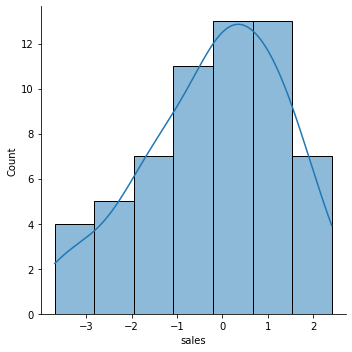

In [196]:
sns.displot(residuals, kde=True)

In [197]:
# 5. Multicollinearity
# https://www.statology.org/multicollinearity-in-python/

In [198]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [ ]:
# In regression analysis, multicollinearity occurs when two or more predictor variables are highly correlated with each other, 
# such that they do not provide unique or independent information in the regression model.

In [ ]:
# If the degree of correlation is high enough between predictor variables, it can cause problems when fitting and interpreting 
# the regression model. 

In [ ]:
# VIF = 1: There is no correlation between a given predictor variable and any other predictor variables in the model.
# VIF between 1 and 5: There is moderate correlation between a given predictor variable & other predictor variables in the model
# VIF > 5: There is severe correlation between a given predictor variable and other predictor variables in the model.

In [200]:
# create DataFrame to hold VIF values

vif_df = pd.DataFrame()
vif_df['variable'] = X.columns

In [201]:
vif_df.head()

,variable
0,TV
1,radio


In [202]:
# calculate VIF for each predictor variable 

vif_df['VIF'] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

In [203]:
# view VIF for each predictor variable 

# IF THE VIF IS GREATER THAN 5, DROP THE COLUMN!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!!

print(vif_df)

  variable       VIF
0       TV  2.238085
1    radio  2.238085


# How good is your fit?  R-squared

In [ ]:
# R-squared is a measure of how close the data is to the fitted regression line
# It's known as coefficient of determination.
# It ranges from 0 to 1
# In general, models with higher R-squared values are preferred because it means the set of predictor variables in the model 
# is capable of explaining the variation in the response variable well.

In [204]:
# Example:
# The R-squared of the model turns out to be 0.7176.
# This means that 71.76% of the variation in the exam scores can be explained by the number of hours studied and the number 
# of prep exams taken. 71.76% of movements of dependent variable are completely explained by movements in the independent var.

In [205]:
from sklearn.metrics import r2_score

In [206]:
r2_score(y_test,y_predictions)

0.9185476109820698